# Milestone Project 1: Food Vision Big

Se the annotated version of this notebook on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb

## Check GPU

Google Colab offers free GPUs, however, not all of them are compatible with mixed precision training.

Google Colab offers:
* k80 (not compatible)
* P100 (not compatible)
* Tesla T4 (compatible)

Knowing this, in order to use mixed precision training we need access to a Tesla T4 (from within Google Colab) or if we're using our own hardware, our GPU need a score of 7.0+ 

## Get helper functions

In past modules, we've created a bunch of helper functions to do small task required for our notebooks.

Rather than rewrite all of these, we can import a script and load them in from there.

The script we've got available can be found on GitHub:
https://raw.githubusercontent.com/JoachimLombardi/Helper_functions/master/course_ztm.py

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/JoachimLombardi/Helper_functions/master/course_ztm.py

--2023-05-13 16:42:23--  https://raw.githubusercontent.com/JoachimLombardi/Helper_functions/master/course_ztm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘course_ztm.py’

course_ztm.py       100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-13 16:42:23 (94.9 MB/s) - ‘course_ztm.py’ saved [10246/10246]



In [ ]:
# import series of helper functions
from course_ztm import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensofFlow Datasets to download data

## Use TensorFlow Datasets to Download Data

if you want to get an overview of TensorFlow Datasets (TFDS),
read the guide:https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [ ]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [ ]:
# List all avalaible datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) # is our target dataset in the list of TFDS datasets

True


In [ ]:
# Load in the data (takes 5-6 minutes)
(train_data, test_data), ds_info = tfds.load(name="food101", 
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, # data get returned in tuple format (data, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete6R80AG/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete6R80AG/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (are they one-hot encoded or are they label encoded) ?
* Do the labels match up with the class names ?

In [ ]:
# Features of food101 from tfds
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10] 

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

In [ ]:
# What does one sample of our training data look like ?
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from food101 (tensor form): 81
  Class name (str form): ramen
  


In [ ]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=81>

In [ ]:
# What does our image tensor look like ?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[242, 254, 252],
        [241, 253, 251],
        [240, 252, 250],
        ...,
        [241, 211, 101],
        [242, 212, 102],
        [245, 215, 105]],

       [[240, 252, 250],
        [240, 252, 250],
        [239, 251, 249],
        ...,
        [245, 215, 105],
        [242, 212, 102],
        [240, 210, 100]],

       [[238, 250, 248],
        [238, 250, 248],
        [238, 250, 248],
        ...,
        [250, 218, 107],
        [243, 211, 100],
        [238, 206,  95]],

       ...,

       [[ 82,  81,  77],
        [ 83,  82,  78],
        [ 82,  81,  77],
        ...,
        [126, 128, 127],
        [135, 137, 136],
        [139, 141, 140]],

       [[ 82,  79,  74],
        [ 82,  79,  74],
        [ 81,  78,  73],
        ...,
        [209, 209, 209],
        [217, 217, 217],
        [215, 215, 215]],

       [[ 78,  75,  70],
        [ 77,  74,  69],
        [ 76,  73,  68],
        ...,
        [187, 187, 18

In [ ]:
# What are the min and max values of our image tensor ?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow Datasets

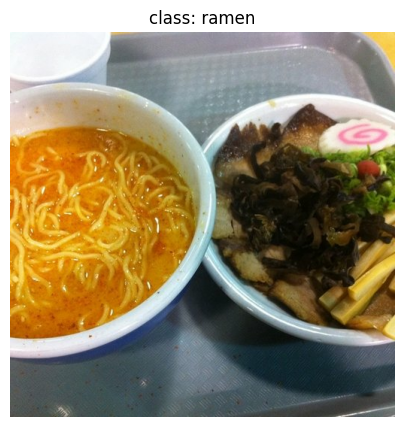

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
# Resize the image
plt.imshow(image)
plt.axis("off")
plt.title(f"class: {class_names[label]}");

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g batched, normalized, etc).

However, not all data (including data from TensorFlow DataSets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 and 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0-1) also called normalized tensors generally perform better

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we're going to be using an EfficientNetBX pretrained model from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in). 

This means our functions needs to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors from `unit8` to `float32`


In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from `uint8` -> `float32` and reshapes image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
  # image = image/255. # Not required for efficientNetBX 
  return tf.cast(image, tf.float32), label # Return a tuple (float32_image, label)


In [ ]:
# Preprocess a single sample image and check the outputs 
preprocessing_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessing_img[:2]}..., \nShape:{preprocessing_img.shape},\nDatatype: {preprocessing_img.dtype}")

Image before preprocessing:
 [[[242 254 252]
  [241 253 251]
  [240 252 250]
  ...
  [241 211 101]
  [242 212 102]
  [245 215 105]]

 [[240 252 250]
  [240 252 250]
  [239 251 249]
  ...
  [245 215 105]
  [242 212 102]
  [240 210 100]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[240.4847  252.4847  250.4847 ]
  [238.42857 250.42857 248.42857]
  [238.29082 249.86224 248.07652]
  ...
  [251.4235  219.20923 107.78071]
  [246.3571  216.3571  106.3571 ]
  [241.92346 211.92346 101.92346]]

 [[237.07143 249.07143 247.07143]
  [238.      250.      248.     ]
  [240.14285 250.14285 249.14285]
  ...
  [248.22957 215.28569 101.85716]
  [250.99489 218.99489 106.27042]
  [243.07126 211.07126 100.07126]]]..., 
Shape:(224, 224, 3),
Datatype: <dtype: 'float32'>


## Batch & prepare datasets

We're now going to make our data input pipeline run really fast.

For more resources on this, I'd highly recommend going through the following guide: https://www.tensorflow.org/guide/data_performance?hl=fr



In [ ]:
# Map preprocessing function to training data (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE) # get as much processors as you can during the mapping
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000 #How many element to shuffle at a time
                                ).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocesing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(tf.data.AUTOTUNE) # While GPU is finding patterns CPU prepare the next batch.
# We also can add .cache to store the already processed tensors in RAM, when we compute it will be able to load them faster, but it ony works if dataset can fit into RAM in colab

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:
* TensorBoard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save our models progress after feature extraction




In [ ]:
# Create tensorboard callback (import from helper_function.py)
from course_ztm import create_tensorboard_callback

# Create ModelCheckpoint callback to save a model's progress during training
checkpoint_path = "drive/MyDrive/101_classes_food/transfer_learning"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

## Setup mixed precision training

First and foremost, for a deeper understanding of mixed precision training, check out the TensorFlow guide for mixed precision: https://www.tensorflow.org/guide/mixed_precision?hl=fr

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance. 



In [ ]:
# Turn on mixed precision training 
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # Set global data policy to mixed precision

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing 

# Create base model
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x =layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Because our labels are integers
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

## Checking layer dtype policies (are we using mixed precision ?)

In [ ]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Going through the above we see:
* `layer.name`: the human readable name of a particular layer
* `layer.trainable`: is the layer trainable or not ? (if not the weights are frozen)
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with

In [ ]:
# Check the dtype_policy attributes of layers in our base model
for layer in base_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Fit the feature extraction model

if our goal is to fine-tune a pretrained model, the general order of doing things is:
1. Build a feature extraction model (train a couple output layers with base layers frozen).
2. Fine-tune some of the frozens layers

In [ ]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                      epochs=3,
                                                      steps_per_epoch=len(train_data),
                                                      validation_data=test_data,
                                                      validation_steps=int(0.15 * len(test_data)),
                                                      callbacks=[model_checkpoint,
                                                                create_tensorboard_callback("drive/MyDrive/101_classes_food",
                                                                                            "efficientnetB0_101_food_classes_feature_extract")])

Saving TensorBoard log files to: drive/MyDrive/101_classes_food/efficientnetB0_101_food_classes_feature_extract/20230513-165843
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7171 - accuracy: 0.5816

2368/2368 [==============================] - 220s 85ms/step - loss: 1.7171 - accuracy: 0.5816 - val_loss: 1.1358 - val_accuracy: 0.6978
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2010 - accuracy: 0.6890

2368/2368 [==============================] - 203s 84ms/step - loss: 1.2010 - accuracy: 0.6890 - val_loss: 1.0307 - val_accuracy: 0.7198
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0547 - accuracy: 0.7248

2368/2368 [==============================] - 213s 89ms/step - loss: 1.0547 - accuracy: 0.7248 - val_loss: 0.9978 - val_accuracy: 0.7217


In [ ]:
# Evaluate model on whole test dataset 
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 59s 75ms/step - loss: 0.9996 - accuracy: 0.7286


[0.9995813965797424, 0.7285940647125244]

## Fine-tuning

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layers except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable=False

In [ ]:
# Recompile (we have to recompile our models every time we make a change)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate dictate how much your model patterns should update to try improve the loss functions
                metrics=["accuracy"])

In [ ]:
initial_epoch = 3

In [ ]:
# Continue to train and fit the model to our data  
fine_tune_epochs = initial_epoch + 3
history_101_food_classes_fine_tuning = model.fit(train_data,
                                                 epochs=fine_tune_epochs,
                                                 validation_data=test_data,
                                                 validation_steps=int(0.15 * len(test_data)),
                                                 initial_epoch=history_101_food_classes_feature_extract.epoch[-1], 
                                                 callbacks=[create_tensorboard_callback(dir_name="drive/MyDrive/101_classes_food/transfer_learning", 
                                                                                                experiment_name="efficientnetB0_101_food_classes_fine_tuning")])

Saving TensorBoard log files to: drive/MyDrive/101_classes_food/transfer_learning/efficientnetB0_101_food_classes_fine_tuning/20230513-171319


Epoch 3/6
2368/2368 [==============================] - 225s 89ms/step - loss: 0.8783 - accuracy: 0.7678 - val_loss: 0.9255 - val_accuracy: 0.7386
Epoch 4/6
2368/2368 [==============================] - 198s 82ms/step - loss: 0.7533 - accuracy: 0.8007 - val_loss: 0.8809 - val_accuracy: 0.7569
Epoch 5/6
2368/2368 [==============================] - 214s 89ms/step - loss: 0.6659 - accuracy: 0.8242 - val_loss: 0.8745 - val_accuracy: 0.7489
Epoch 6/6
2368/2368 [==============================] - 189s 79ms/step - loss: 0.5931 - accuracy: 0.8451 - val_loss: 0.8573 - val_accuracy: 0.7611


In [ ]:
# Evaluate model on whole test dataset 
results_fine_tune_model = model.evaluate(test_data)
results_fine_tune_model

790/790 [==============================] - 54s 68ms/step - loss: 0.8776 - accuracy: 0.7584


[0.877644419670105, 0.7584158182144165]

## Viewing our experiments data on TensorBoard

In [ ]:
# View tensorboard logs on transfer learning experiments (should be ~4 models)
# Upload TensorBoard dev records 
!tensorboard dev upload --logdir ./drive/MyDrive/101_classes_food/transfer_learning \
 --name "Transfer Learning Experiments with 10 Food101 Classes" \
 --description "A series of different transfer learning experiments with varying amouts of data and fine-tuning." \
 --one_shot # Exits the uploader 

2023-05-13 17:27:25.975771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./drive/MyDrive/101_classes_food/transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   JRTF-QZDG



New experiment created. View your TensorBoard

In [ ]:
# Import series of helper functions to evaluate fine-tuning
from course_ztm import compare_historys

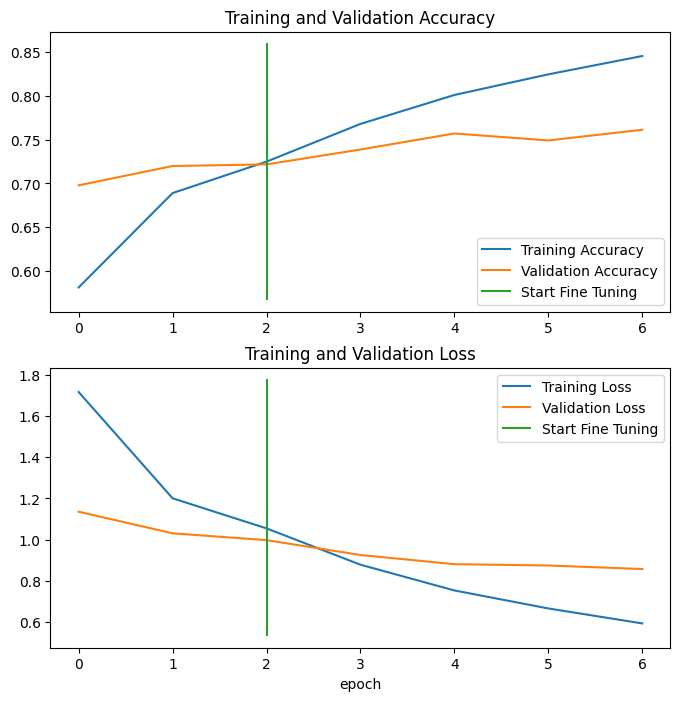

In [ ]:
# Compare the histories of feature extration and fine tuning
compare_historys(history_101_food_classes_feature_extract,
                 history_101_food_classes_fine_tuning,
                 initial_epoch)

We've covered a lot so far but since this is a milestone project, it's time for you to takeover. 

More speciffically, your challenge is to complete the template version of 07 to obtain a computer vision model (building off the one we build in this notebook) to beat the DeepFood paper.

In other word you're going to create Food Vision Big !!!

you can find the template notebook here: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/TEMPLATE_07_food_vision_milestone_project_1.ipynb

If you are stuck you can refer to the example version (non-template): https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb


